In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv('titanic3.csv')

In [4]:
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.4+ KB


In [6]:
dataset.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
dataset[['sex','survived']].groupby(['sex'],as_index=False).mean().sort_values(by='survived',ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [8]:
dataset[['pclass','survived']].groupby(['pclass'],as_index=False).mean().sort_values(by='survived',ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [9]:
dataset[['parch','survived']].groupby(['parch'],as_index=False).mean().sort_values(by='survived',ascending=False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


In [10]:
dataset[['sibsp','survived']].groupby(['sibsp'],as_index=False).mean().sort_values(by='survived',ascending=False)

,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


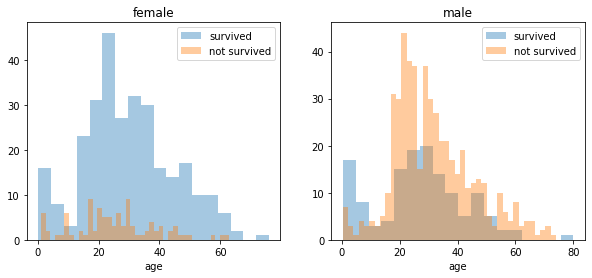

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = dataset[dataset['sex']=='female']
men = dataset[dataset['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('male')

Text(0.5, 1.0, 'Distribution of Age of Survivors and Non-Survivors')

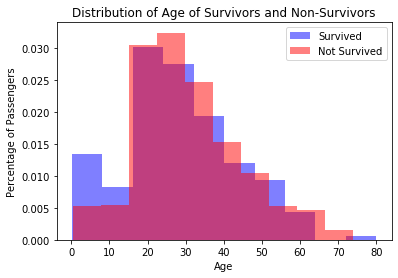

In [12]:
from matplotlib import pyplot as plt
age_survived = dataset.loc[dataset['survived']==1, "age"]
age_survived.plot.hist(fc=(0, 0, 1, 0.5), density=1, label="Survived")
age_did_not_survive = dataset.loc[dataset['survived']==0, "age"]
age_did_not_survive.plot.hist(fc=(1, 0, 0, 0.5), density=1, label="Not Survived")
plt.xlabel("Age")
plt.ylabel("Percentage of Passengers")
plt.legend(loc='upper right')
plt.title("Distribution of Age of Survivors and Non-Survivors")

In [13]:
dataset['nfamily']=dataset['sibsp']+dataset['parch']
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,nfamily
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


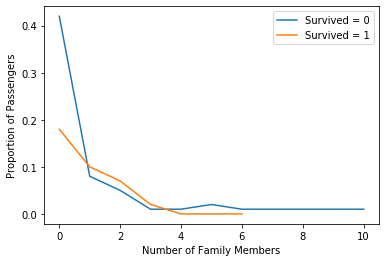

In [14]:
count = dataset.groupby(["survived","nfamily"]).count()
count.reset_index(inplace=True)
count = count[["survived", "nfamily",'name']]

num_passengers = len(dataset)
count["Percentage"] = round(count["name"].div(num_passengers),2)

fig,ax = plt.subplots()

for i in range(2):
    ax.plot(count[count.survived==i].nfamily, count[count.survived==i].Percentage, label="Survived = "+ str(i))

ax.set_xlabel("Number of Family Members")
ax.set_ylabel("Proportion of Passengers")
ax.legend(loc='best')